Cross validataion for optimal n_subtypes. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from bebms.cross_validate import cross_validatation

/home/hhao9/miniconda/envs/jobs/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_file = '../adni.csv'

In [3]:
cvic_scores, optimal_n = cross_validatation(
    data_file=data_file,
    iterations=10000,
    n_shuffle=2,
    n_subtype_shuffle=2,
    burn_in=200,
    prior_n=1,
    prior_v=1,
    max_n_subtypes=6,
    N_FOLDS=5,
    seed=42,
    with_labels=True,
    z_score_norm=False,
)

Validating n_subtypes: 100%|██████████| 6/6 [38:53<00:00, 388.89s/it]


In [4]:
# cvic_scores = np.array([-400.107551, -733.310240, -885.002979, -827.213347, -737.591020, -755.599433])

In [5]:
print(optimal_n) # 3

4


   n_subtypes        CVIC
0           1 -318.952255
1           2 -839.152672
2           3 -793.380320
3           4 -906.579510
4           5 -883.716752
5           6 -896.783900


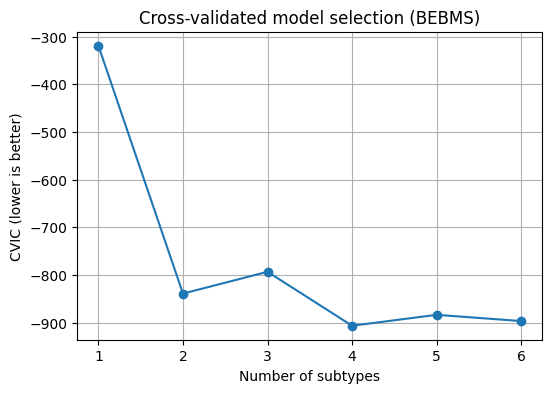

In [6]:
# Summarize results
df_cvic = pd.DataFrame({
    "n_subtypes": np.arange(1, 7),
    "CVIC": cvic_scores
})
print(df_cvic)

# Plot CVIC curve
plt.figure(figsize=(6,4))
plt.plot(df_cvic["n_subtypes"], df_cvic["CVIC"], marker="o")
plt.xlabel("Number of subtypes")
plt.ylabel("CVIC (lower is better)")
plt.title("Cross-validated model selection (BEBMS)")
plt.grid(True)
plt.savefig(f"adni_my/cross_validataion.pdf", bbox_inches="tight", dpi=300)
plt.savefig(f"adni_my/cross_validataion.png", bbox_inches="tight", dpi=300)
plt.show()